In [4]:
import pandas as pd
import numpy as np

In [5]:
davis_df = pd.read_csv('Davis.csv')

In [6]:
davis_df

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
197,198,M,81,175,NaN,NaN
198,199,M,90,181,91.0,178.0


In [7]:
davis_df.dropna(inplace=True)

In [8]:
davis_df

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
194,195,F,62,164,61.0,161.0
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
198,199,M,90,181,91.0,178.0


# Выделите тестовую выборку из 50 экземпляров

In [9]:
from sklearn.model_selection import train_test_split 

In [10]:
davis_df.columns

Index(['Unnamed: 0', 'sex', 'weight', 'height', 'repwt', 'repht'], dtype='object')

In [11]:
features= ["Unnamed: 0", "sex", "weight", "height", "repwt"]

In [12]:
X = davis_df[features]
y = davis_df["repht"]

In [13]:
X_train, X_test, y_train , y_test = train_test_split(X,y, train_size= 131,test_size=50,random_state=0)

In [14]:
X_test.shape

(50, 5)

# На тренировочных данных постройте:
    Гистограмму height
    Гистограмму weight
    Эти же гистограммы для разных полов

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

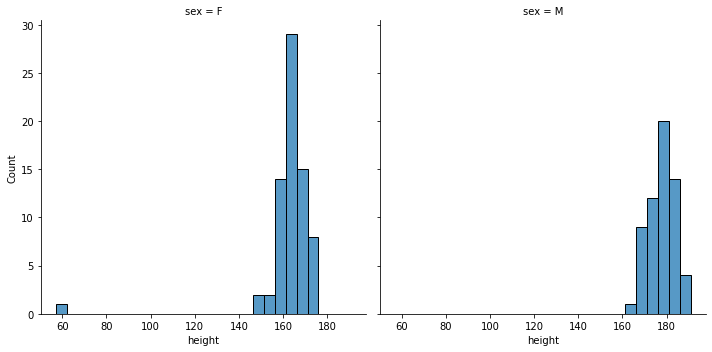

In [16]:
sns.displot(data = X_train, x = "height", col="sex");

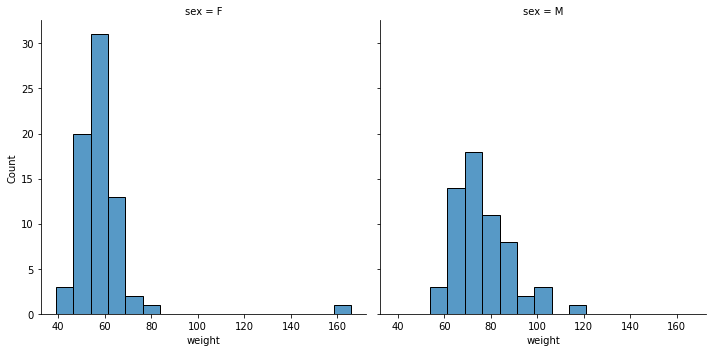

In [17]:
sns.displot(data = X_train, x = "weight", col="sex");

# На тренировочных данных обучите классификатор пола (sex), используя только признаки height и weight. Замерьте производительность на тренировочной и тестовой выборке (через Accuracy). Рекомендуемые модели:  логистическая регрессия, quadratic discriminant analysis.

In [18]:
DUMMY_SEP = '__'

In [19]:
X_train_dummies = pd.get_dummies(X_train, prefix_sep=DUMMY_SEP)

In [20]:
X_train_dummies

,Unnamed: 0,weight,height,repwt,sex__F,sex__M
165,166,59,159,59.0,1,0
16,17,92,187,101.0,0,1
53,54,102,185,107.0,0,1
76,77,50,160,55.0,1,0
133,134,50,148,47.0,1,0
...,...,...,...,...,...,...
109,110,59,166,55.0,1,0
71,72,66,173,66.0,0,1
123,124,55,165,55.0,1,0
49,50,75,162,75.0,1,0


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [22]:
logr_cls = LogisticRegression()

In [23]:
logr_cls.fit(X_train_dummies, y_train)

c:\users\khanh\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
print(classification_report(y_train, logr_cls.predict(X_train_dummies)))

              precision    recall  f1-score   support

       148.0       0.00      0.00      0.00         1
       150.0       0.00      0.00      0.00         2
       152.0       0.00      0.00      0.00         1
       153.0       0.50      0.50      0.50         2
       155.0       0.00      0.00      0.00         4
       158.0       0.00      0.00      0.00         6
       159.0       0.00      0.00      0.00         3
       160.0       0.06      0.10      0.08        10
       161.0       0.00      0.00      0.00         3
       163.0       0.27      0.36      0.31        11
       164.0       0.00      0.00      0.00         1
       165.0       0.09      0.18      0.12        17
       166.0       0.00      0.00      0.00         1
       168.0       0.00      0.00      0.00         4
       169.0       0.00      0.00      0.00         2
       170.0       0.18      0.20      0.19        10
       171.0       0.00      0.00      0.00         3
       172.0       0.00    

c:\users\khanh\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\khanh\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\khanh\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [24]:
fprl, tprl, _ = roc_curve(y_train, logr_cls.predict_proba(X_train_dummies)[:,1])

ValueError: multiclass format is not supported